In [2]:
#NUMERICAL LIBRARIES
import numpy as np

#TO HANDLE DATA IN THE FORM OF ROWS & COLUMNS
import pandas as pd

#TO VISUALISE DATA
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORTING LINEAR REGRESSION MACHINE LEARNING LIBRARY
from sklearn.linear_model import LinearRegression

In [4]:
#READING THE CSV FILE INTO PANDAS DATAFRAME
house_data = pd.read_csv('/content/Housing.csv')

In [5]:
#TO CHECK THE DATA STRUCTURE CHECK THE FIRST FEW RECORDS
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
#TO DESCRIBE THE DATASET
house_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
#TO CHECK THE TOTAL NUMBER OF NULL VALUES
house_data.isnull().sum().sum()

np.int64(0)

In [9]:
#TO CHECK THE TOTAL NUMBER OF ROWS & COLUMNS
house_data.shape

(545, 13)

In [10]:
#TO CHECK THE DATATYPES PRESENT IN THE DATASET
house_data.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [11]:
#TO CHECK COLUMNS
house_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# ***DATA ANALYSIS AND VISUALISATION***


# ***EXPLORATORY DATA ANALYSIS***


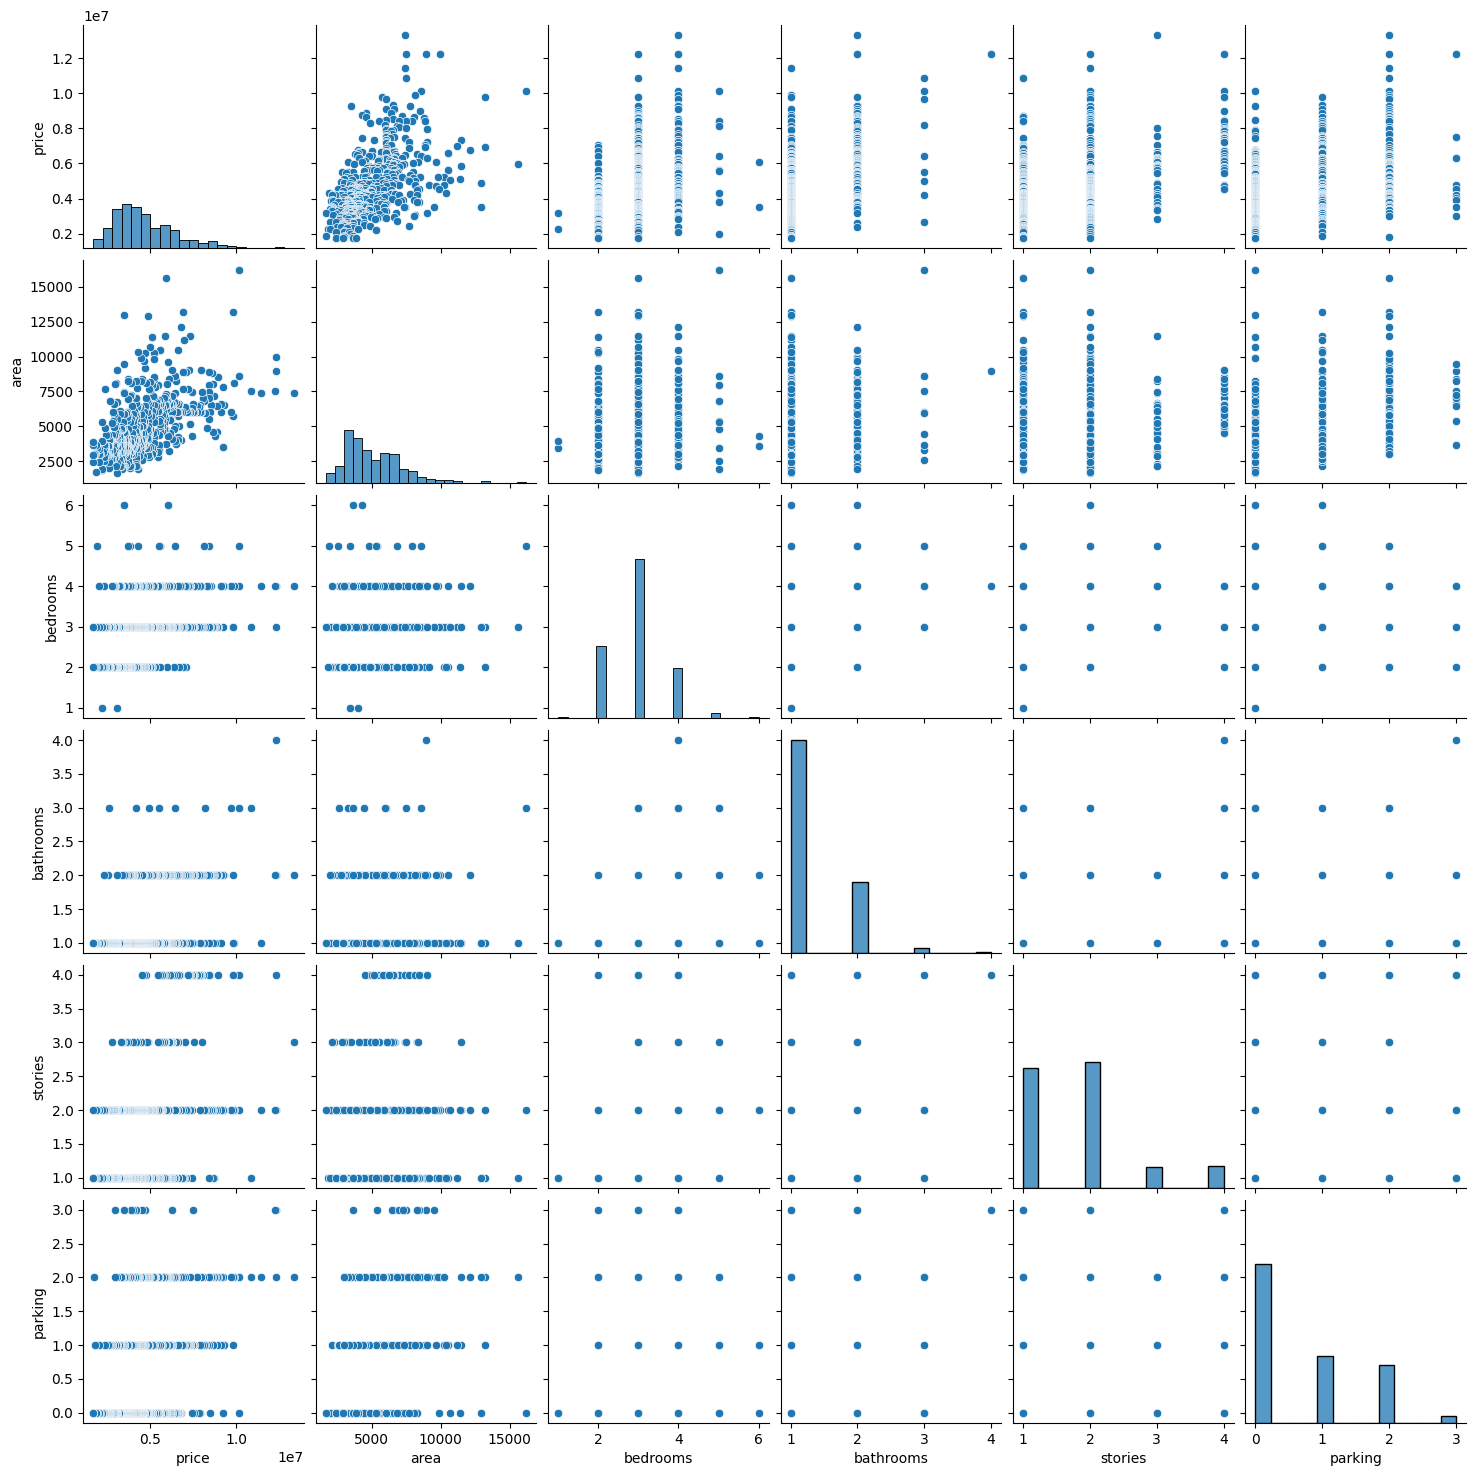

In [13]:
#USING PAIRPLOT - MULTIVARIATE
sns.pairplot(house_data)
plt.show()

"PRICE"- is our target variable

HISTOGRAM - USED TO UNDERSTAND THE DISTRIBUTION OF VARIOUS FEATURES PRESENT IN THE DATASET


<ipython-input-14-8b9f1ec0c8eb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data['price'], bins = 20)


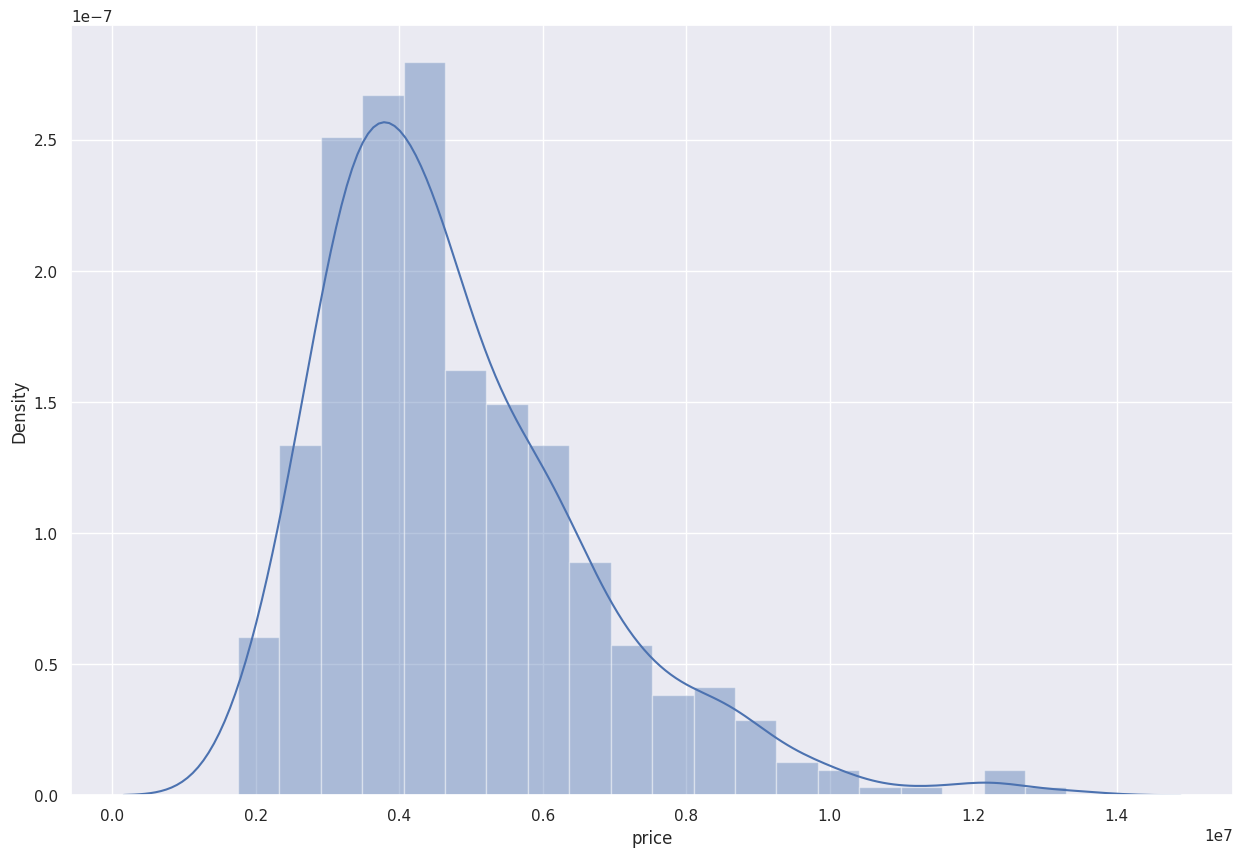

In [14]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(house_data['price'], bins = 20)
plt.show()

THE GRAPH IS POSITIVELY SKEWED(RIGHT SKEWED) AS IT HAS A TAIL TOWARDS THE RIGHT SIDE OF THE GRAPH




***CORRELATION HEATMAP***


In [15]:
numeric_features = house_data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [17]:
categorical_features = house_data.select_dtypes(include=[object])
categorical_features.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [18]:
correlation = numeric_features.corr()
print(correlation['price'].sort_values(ascending=False))

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


<Axes: title={'center': 'CORRELATION OF NUMERIC FEATURES WITH PRICE'}>

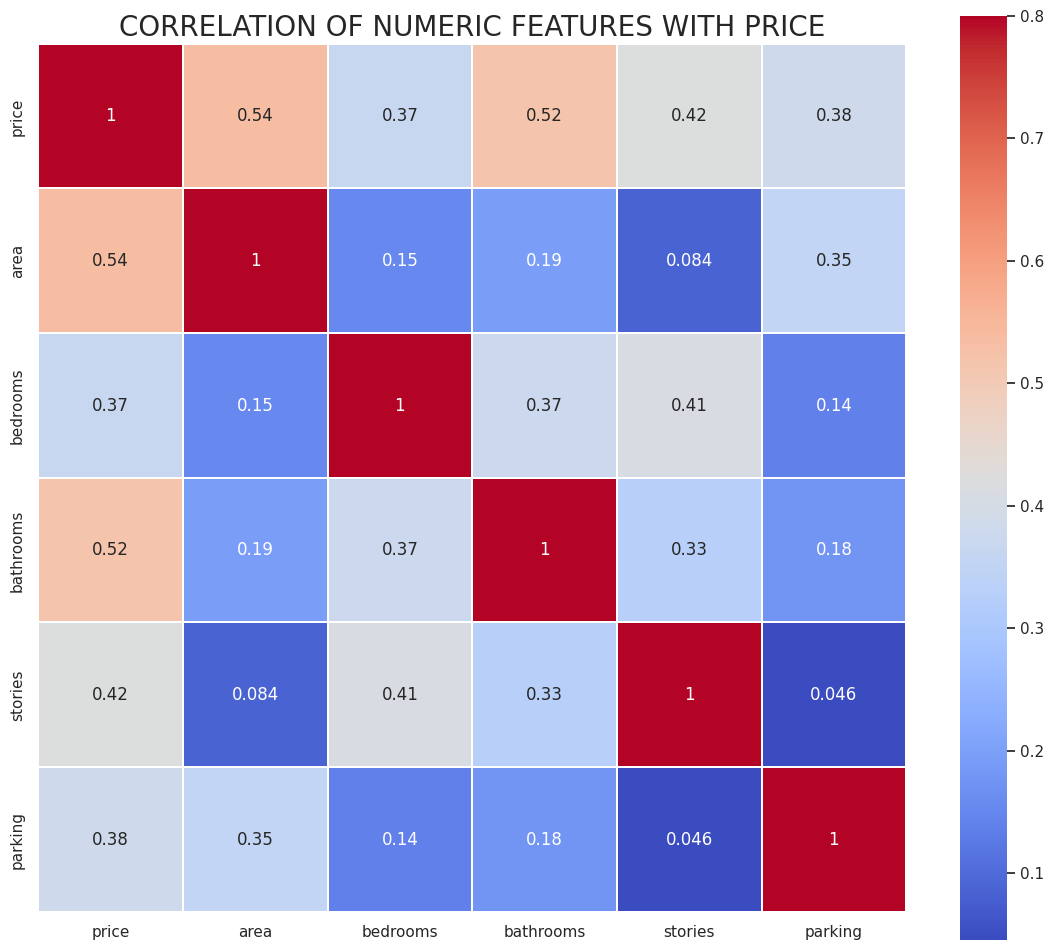

In [21]:
f , ax = plt.subplots(figsize=(14,12))
plt.title('CORRELATION OF NUMERIC FEATURES WITH PRICE', y=1, size=20)
sns.heatmap(correlation, square = True, vmax= 0.8, linewidths=0.1, cmap='coolwarm', linecolor='white', annot=True)

#***SCATTERPLOT***

<Axes: xlabel='parking', ylabel='price'>

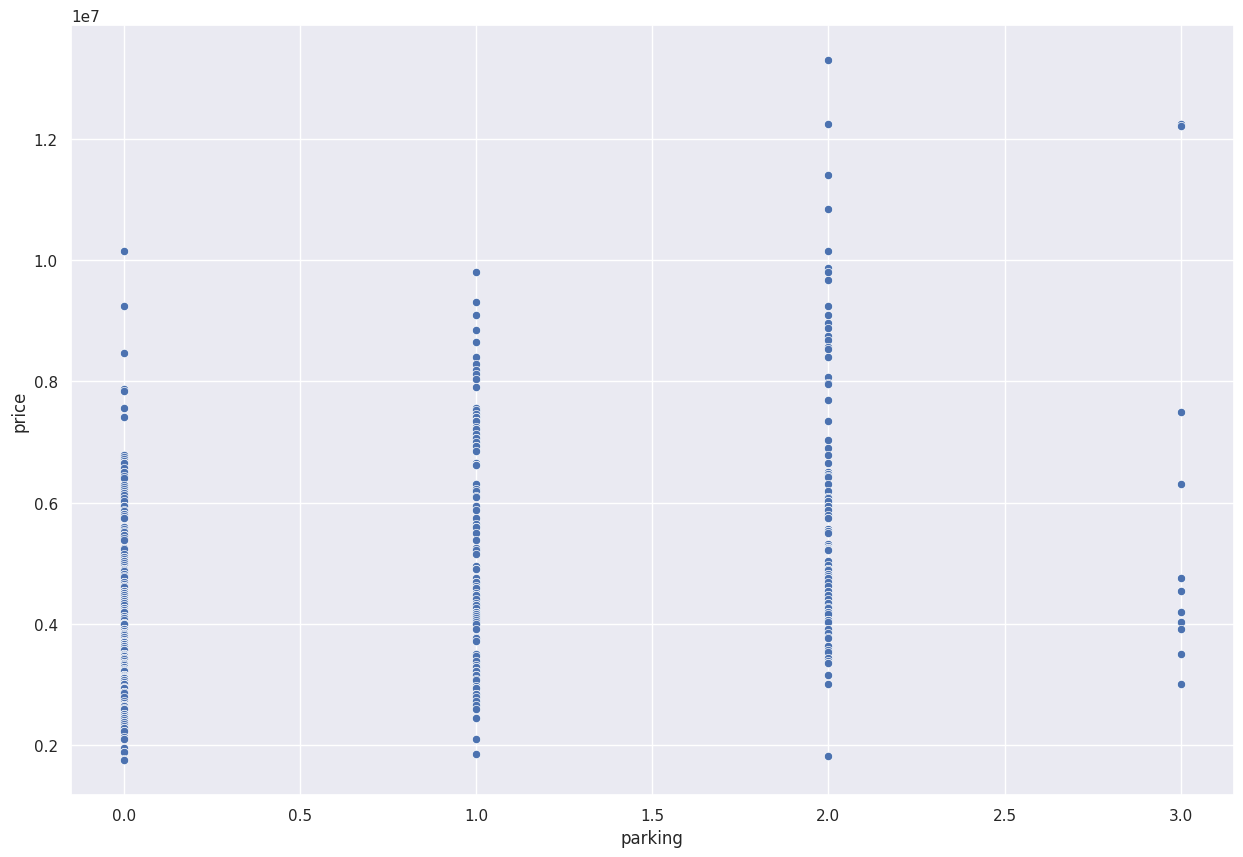

In [24]:
sns.scatterplot(x='parking', y='price', data=house_data)

***REGPLOT IS A PART OF SCATTERPLOT USING REGPLOT WE CAN FIT A LINE IN THE GRAPH***

<Axes: xlabel='parking', ylabel='price'>

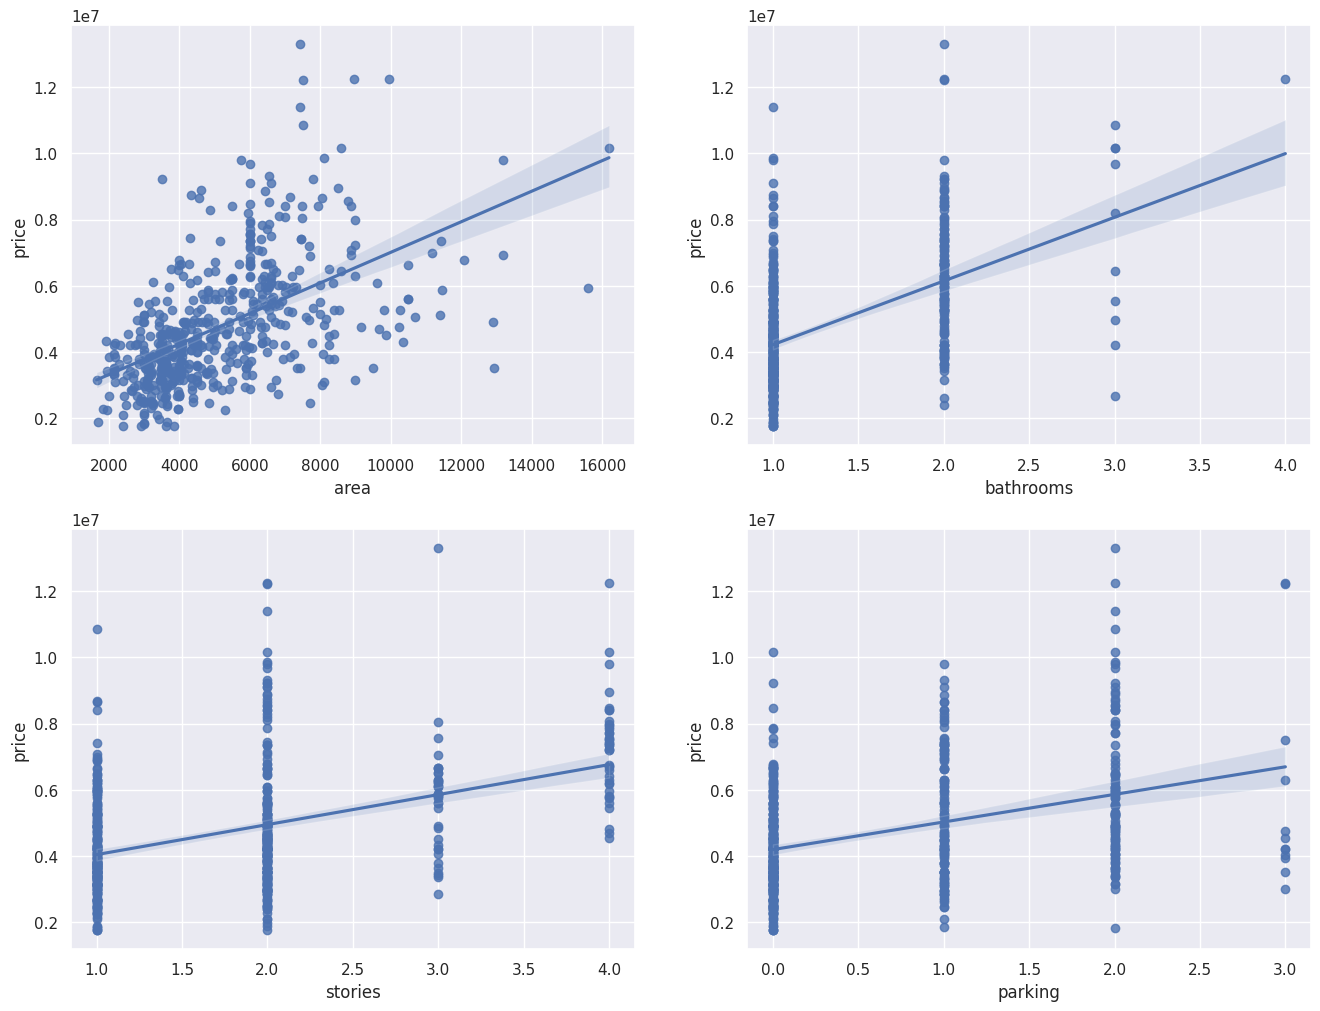

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.regplot(x='area', y='price', data=house_data, scatter= True, ax=ax1)
sns.regplot(x='bathrooms', y='price', data=house_data, scatter= True, ax=ax2)
sns.regplot(x='stories', y='price', data=house_data, scatter= True, ax=ax3)
sns.regplot(x='parking', y='price', data=house_data, scatter= True, ax=ax4)


# ***OUTLIERS***

<Axes: xlabel='price'>

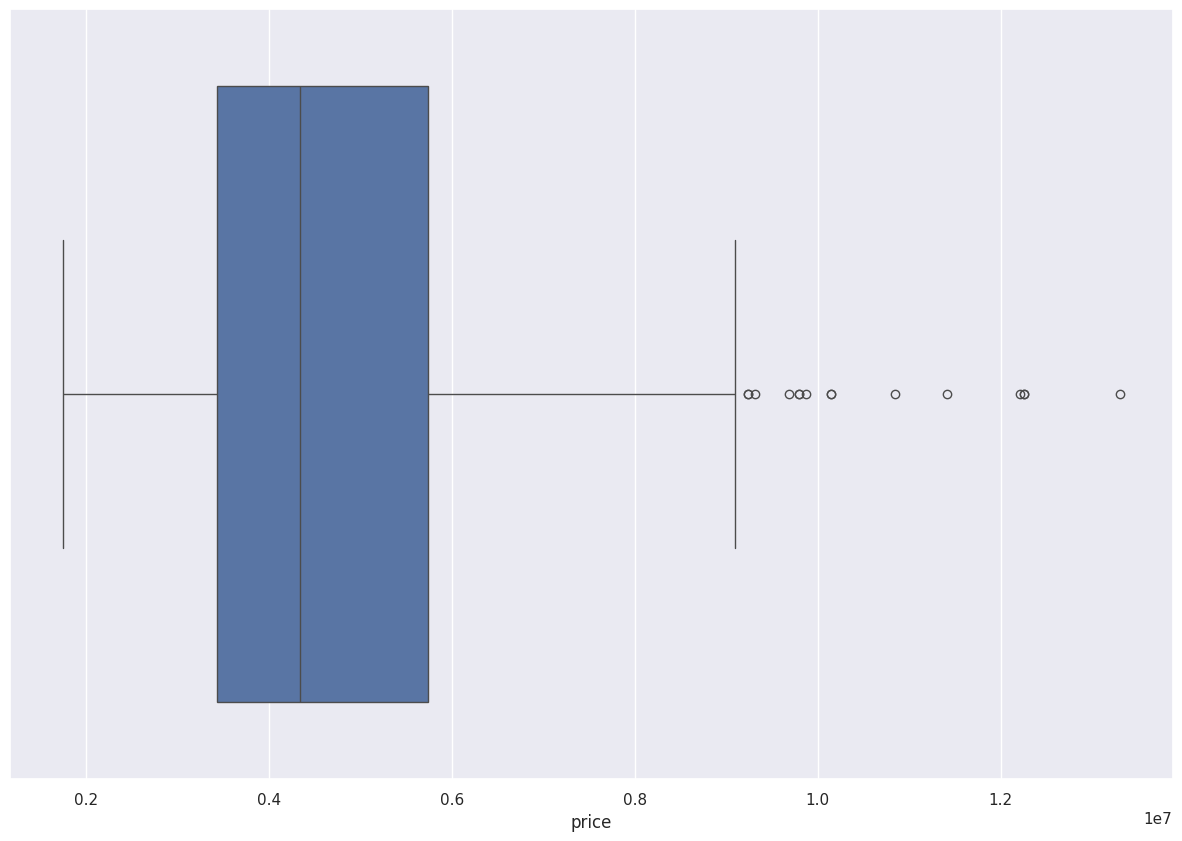

In [27]:
sns.boxplot(x=house_data['price'])

In [28]:
house_data.shape

(545, 13)

In [30]:
first_quartile = house_data['price'].quantile(0.25)
third_quartile = house_data['price'].quantile(0.75)
IQR= third_quartile - first_quartile

In [34]:
new_boundary = third_quartile + 1.5*IQR

In [35]:
new_house_data = house_data.drop(house_data[house_data['price'] > new_boundary].index, axis=0)

In [36]:
new_house_data.shape

(530, 13)

<Axes: xlabel='price'>

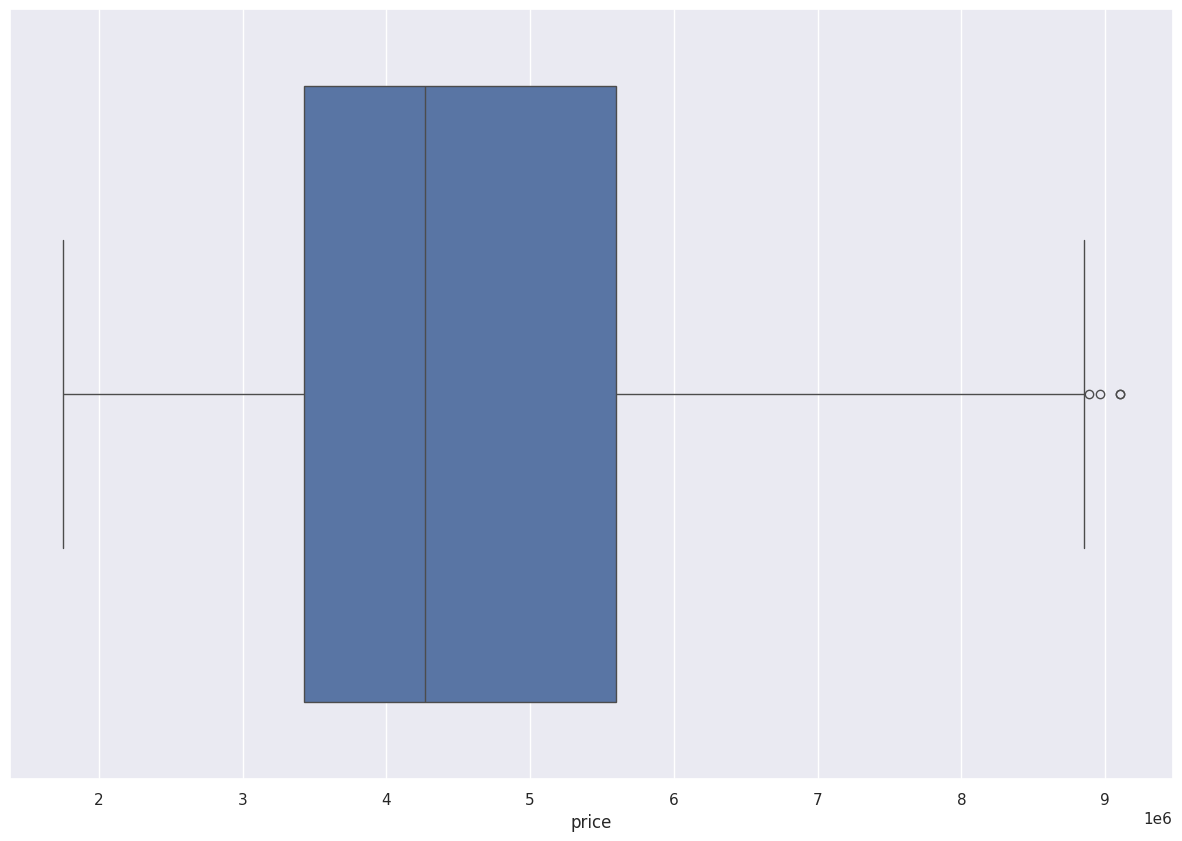

In [37]:
sns.boxplot(x=new_house_data['price'])

# ***LINEAR REGRESSION***

In [54]:
X= house_data.drop('price', axis=1)
y= house_data['price']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

***COVERTING CATERGORICAL DATA INTO NUMERICAL DATA***

In [50]:
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [52]:
house_data['mainroad']= house_data['mainroad'].replace({'no':0, 'yes':1})
house_data['guestroom']= house_data['guestroom'].replace({'no':0, 'yes':1})
house_data['basement']= house_data['basement'].replace({'no':0, 'yes':1})
house_data['hotwaterheating']= house_data['hotwaterheating'].replace({'no':0, 'yes':1})
house_data['airconditioning']= house_data['airconditioning'].replace({'no':0, 'yes':1})
house_data['prefarea']= house_data['prefarea'].replace({'no':0, 'yes':1})
house_data['furnishingstatus']= house_data['furnishingstatus'].replace({'furnished':0, 'semi-furnished':1, 'unfurnished':2})

<ipython-input-52-1d5f174c24bc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_data['mainroad']= house_data['mainroad'].replace({'no':0, 'yes':1})
<ipython-input-52-1d5f174c24bc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_data['guestroom']= house_data['guestroom'].replace({'no':0, 'yes':1})
<ipython-input-52-1d5f174c24bc>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To op

In [53]:
house_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
print(X_train, y_train)

[[-0.32683478  1.32341426  1.39872906 ...  1.52046638 -0.57229899
  -0.06956448]
 [-0.75472644 -1.30273592 -0.58237046 ... -0.79672438 -0.57229899
  -0.06956448]
 [ 0.87661052  0.01033917  1.39872906 ...  2.67906176 -0.57229899
  -0.06956448]
 ...
 [-0.09506013  0.01033917 -0.58237046 ... -0.79672438  1.7473384
   1.25563888]
 [ 0.19911539  0.01033917 -0.58237046 ...  0.361871   -0.57229899
  -0.06956448]
 [ 1.67890739  1.32341426  1.39872906 ...  1.52046638 -0.57229899
  -1.39476784]] 180    5215000
189    5040000
93     6300000
444    3220000
81     6615000
        ...   
129    5873000
144    5600000
72     6720000
235    4620000
37     7980000
Name: price, Length: 381, dtype: int64


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Make predictions
lm_prediction = lm.predict(X_test)

# Evaluation metrics
mae_lm = mean_absolute_error(y_test, lm_prediction)
mse_lm = mean_squared_error(y_test, lm_prediction)
rmse_lm = np.sqrt(mse_lm)

# RMSE is the square root of MSE

# Print the results
print(f"MAE: {mae_lm}")
print(f"MSE: {mse_lm}")
print(f"RMSE: {rmse_lm}")

MAE: 855894.768405006
MSE: 1375329793553.131
RMSE: 1172744.5559682343
